In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [12]:
# Load data
data_path = "../data/"

all_C = np.load(data_path + 'all_C.npy') # 1326 input matrices of size 30x30
nMF_label = np.load(data_path + 'nMF_labels.npy') # 1326 output labels (0 or 1)
k3means_label = np.load(data_path + 'KMeans_labels_k3.npy') # 1326 output labels (0, 1 or 2)

print(f"Number of Cs, nMF_labels, and kmeans labels:\n {len(all_C)}, {len(nMF_label)}, {len(k3means_label)}\n")


Number of Cs, nMF_labels, and kmeans labels:
 1326, 1326, 1326



Working with Kmeans labels:

In [13]:
# filter out rows with zero values in k3means_label
non_zero_indices = np.where(k3means_label != 0)[0]
all_C = all_C[non_zero_indices]
k3means_label = k3means_label[non_zero_indices]

print(f"Number of Cs and labels after removing those with kmeans zero labels:\n {len(all_C)}, {len(k3means_label)}\n")

Number of Cs and labels after removing those with kmeans zero labels:
 1325, 1325



In [14]:
# Replace values in k3means_label 
k3means_label[k3means_label == 1] = 0  # Replace 1 with 0
k3means_label[k3means_label == 2] = 1  # Replace 2 with 1

print(f"Updated k3means_label: {np.unique(k3means_label, return_counts=True)}")

Updated k3means_label: (array([0, 1], dtype=int32), array([795, 530]))


In [15]:
class_0_C = all_C[k3means_label == 0] 
class_1_C = all_C[k3means_label == 1] 

print(f"Number of input matrices with kmeans3 label 0: {class_0_C.shape[0]}")
print(f"Number of input matrices with kmeans3 label 1: {class_1_C.shape[0]}")

Number of input matrices with kmeans3 label 0: 795
Number of input matrices with kmeans3 label 1: 530


In [16]:
# Check the normality of the data
non_normal_indices = []

# Test each matrix individually
for i in range(len(all_C)):
    # Flatten current matrix
    matrix_flat = all_C[i].flatten()
    
    # Perform normality test
    _, p_value = stats.normaltest(matrix_flat)
    
    # If p-value <= 0.05, the distribution is not normal
    if p_value <= 0.05:
        non_normal_indices.append(i)

# Print results
if len(non_normal_indices) == 0:
    print("Normality check passed: All matrices are normally distributed")
else:
    print(f"Normality check failed: {len(non_normal_indices)} out of {len(all_C)} matrices are not normally distributed")

Normality check failed: 1324 out of 1325 matrices are not normally distributed


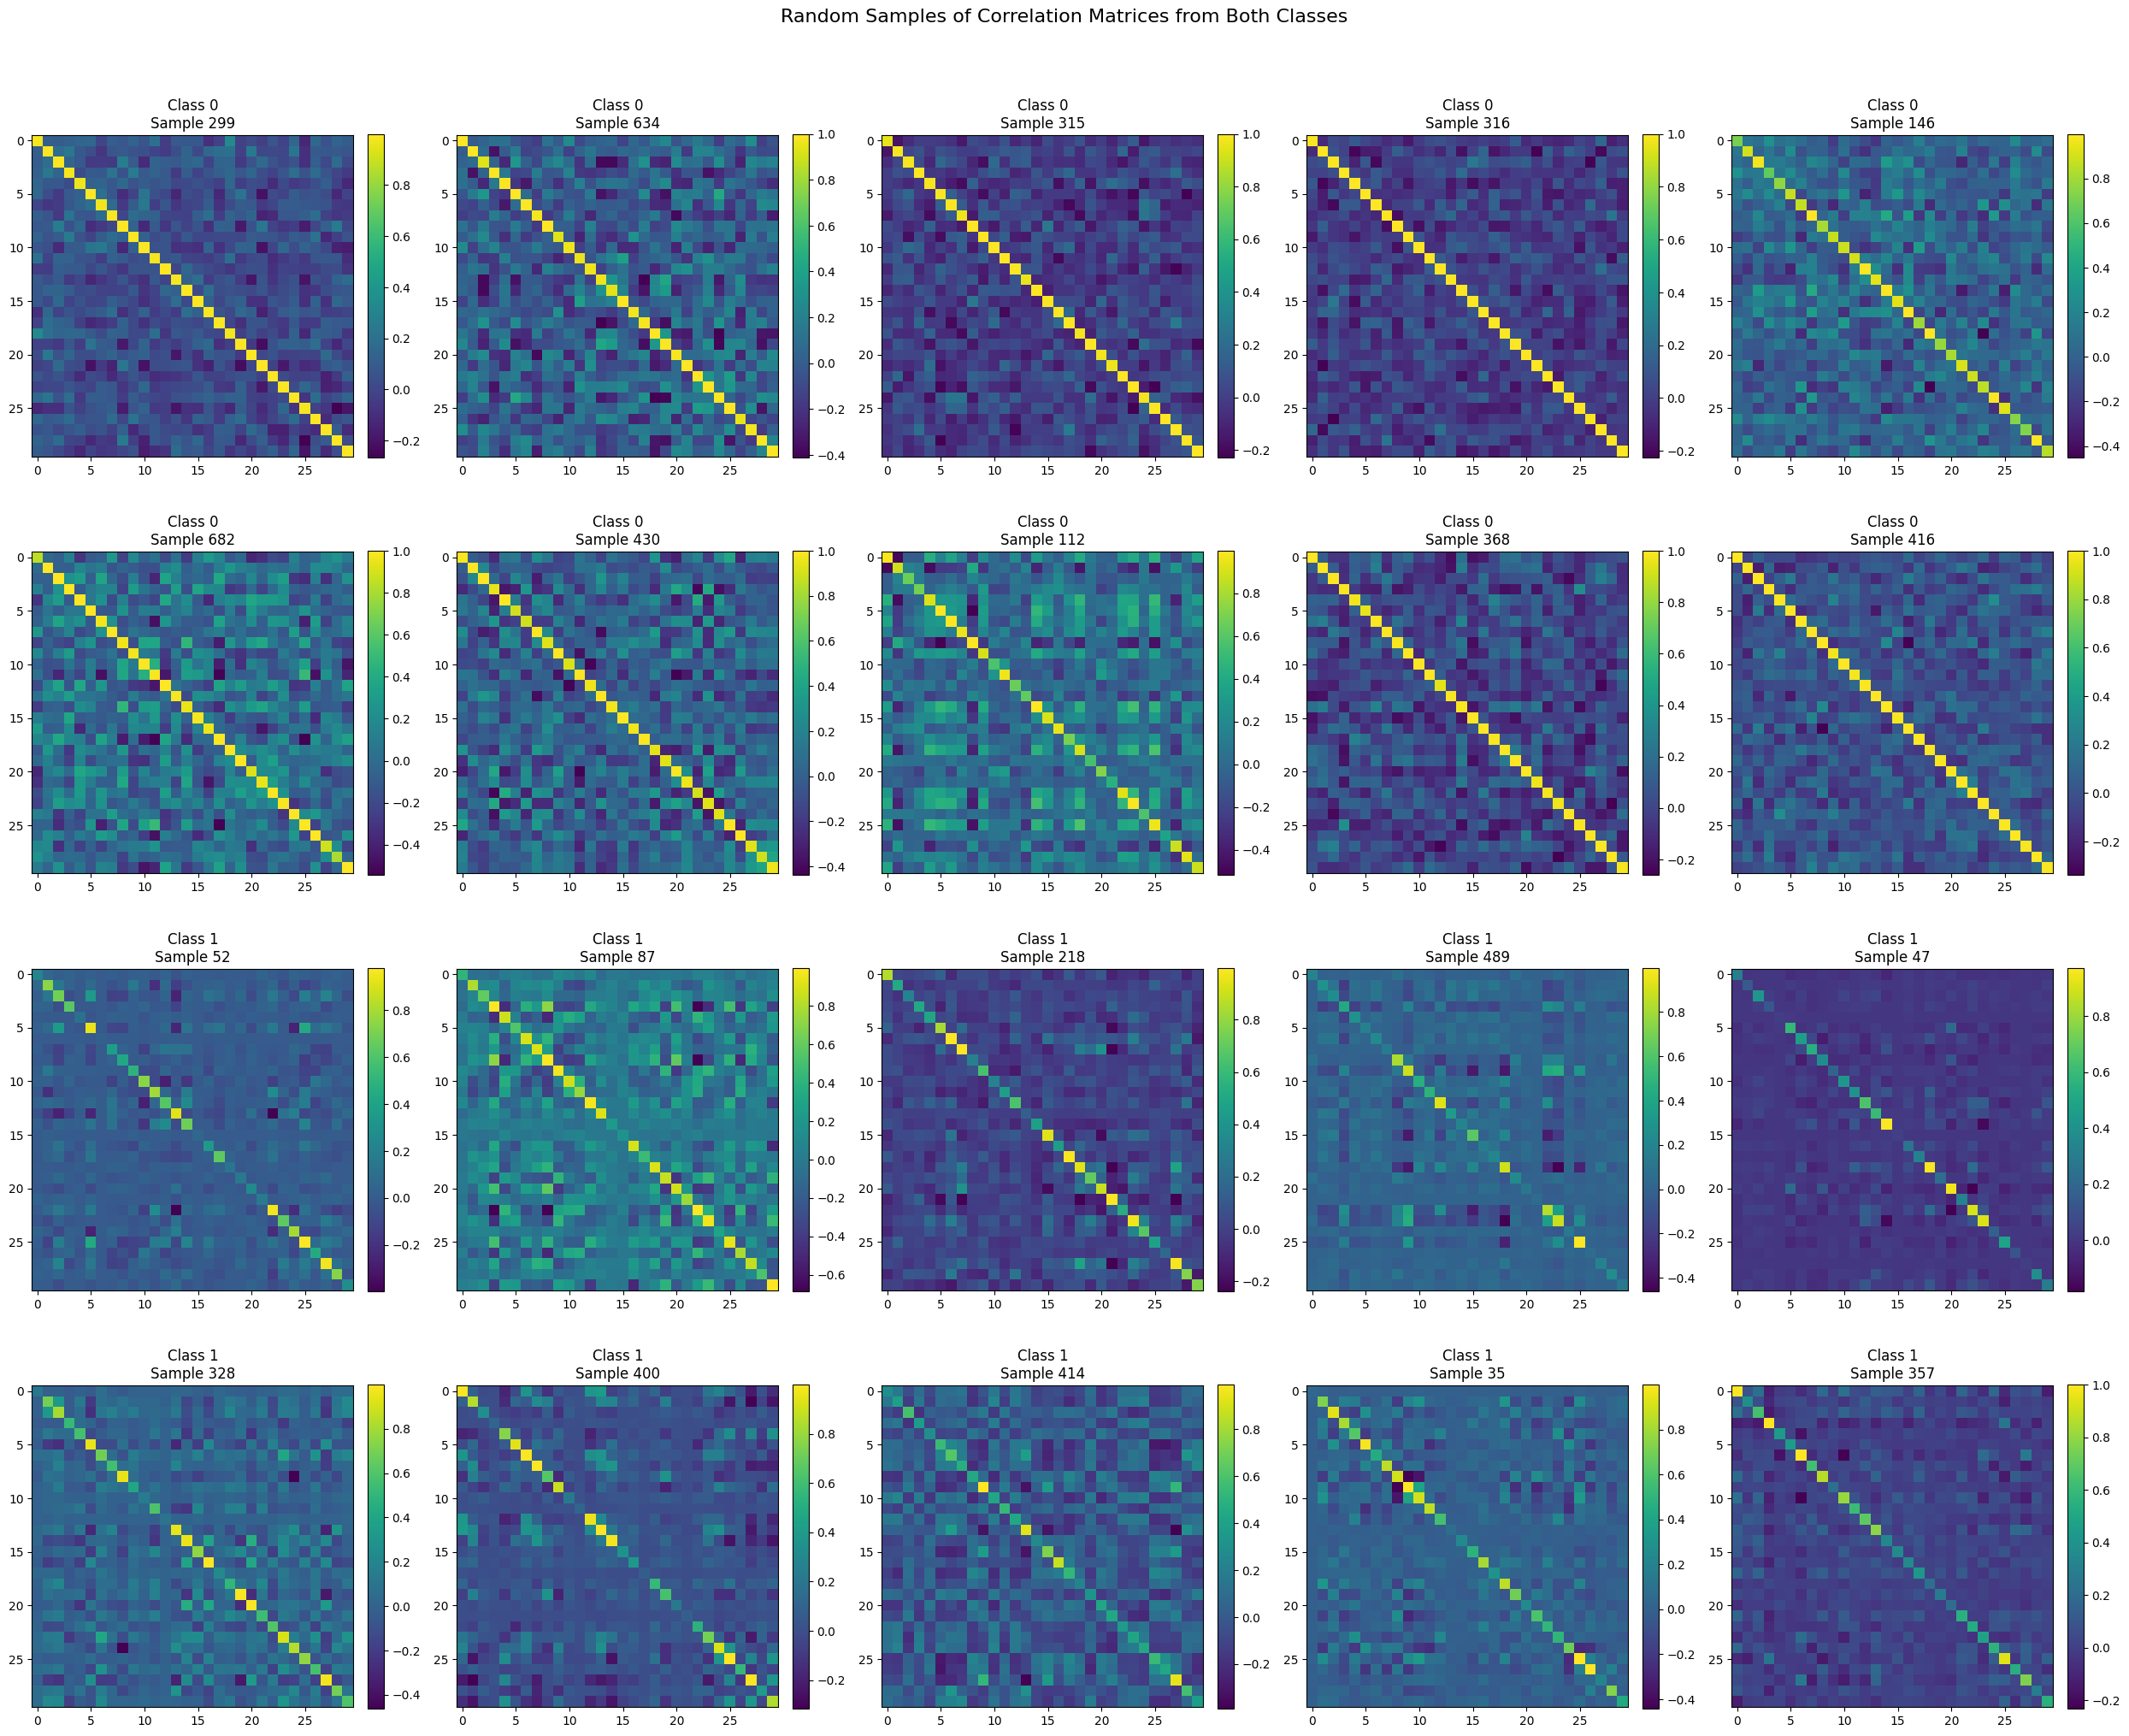

In [18]:
# Inspect the matrices
plt.figure(figsize=(25, 20))

# Plot 10 random matrices from class 0 
for i in range(10):
    row = i // 5  # 0 for first 5 items, 1 for next 5
    col = i % 5   # 0-4 for each row
    plt.subplot(4, 5, row*5 + col + 1)
    random_idx = np.random.randint(0, len(class_0_C))
    im = plt.imshow(class_0_C[random_idx], cmap='viridis')
    plt.title(f'Class 0\nSample {random_idx}')
    plt.colorbar(im, fraction=0.046, pad=0.04)

# Plot 10 random matrices from class 1 
for i in range(10):
    row = i // 5  # 0 for first 5 items, 1 for next 5
    col = i % 5   # 0-4 for each row
    plt.subplot(4, 5, (row+2)*5 + col + 1)  # +2 to start from third row
    random_idx = np.random.randint(0, len(class_1_C))
    im = plt.imshow(class_1_C[random_idx], cmap='viridis')
    plt.title(f'Class 1\nSample {random_idx}')
    plt.colorbar(im, fraction=0.046, pad=0.04)

# Add a main title
plt.suptitle('Random Samples of Correlation Matrices from Both Classes', 
             fontsize=16, y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/var/folders/rz/xbbk13895bx876fqwb2x4v540000gn/T/ipykernel_31105/1689889185.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mins, maxs], labels=['Min Values', 'Max Values'])
/var/folders/rz/xbbk13895bx876fqwb2x4v540000gn/T/ipykernel_31105/1689889185.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([class_mins, class_maxs], labels=['Min Values', 'Max Values'])
/var/folders/rz/xbbk13895bx876fqwb2x4v540000gn/T/ipykernel_31105/1689889185.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([class_mins, class_maxs], labels=['Min Values', 'Max Values'])


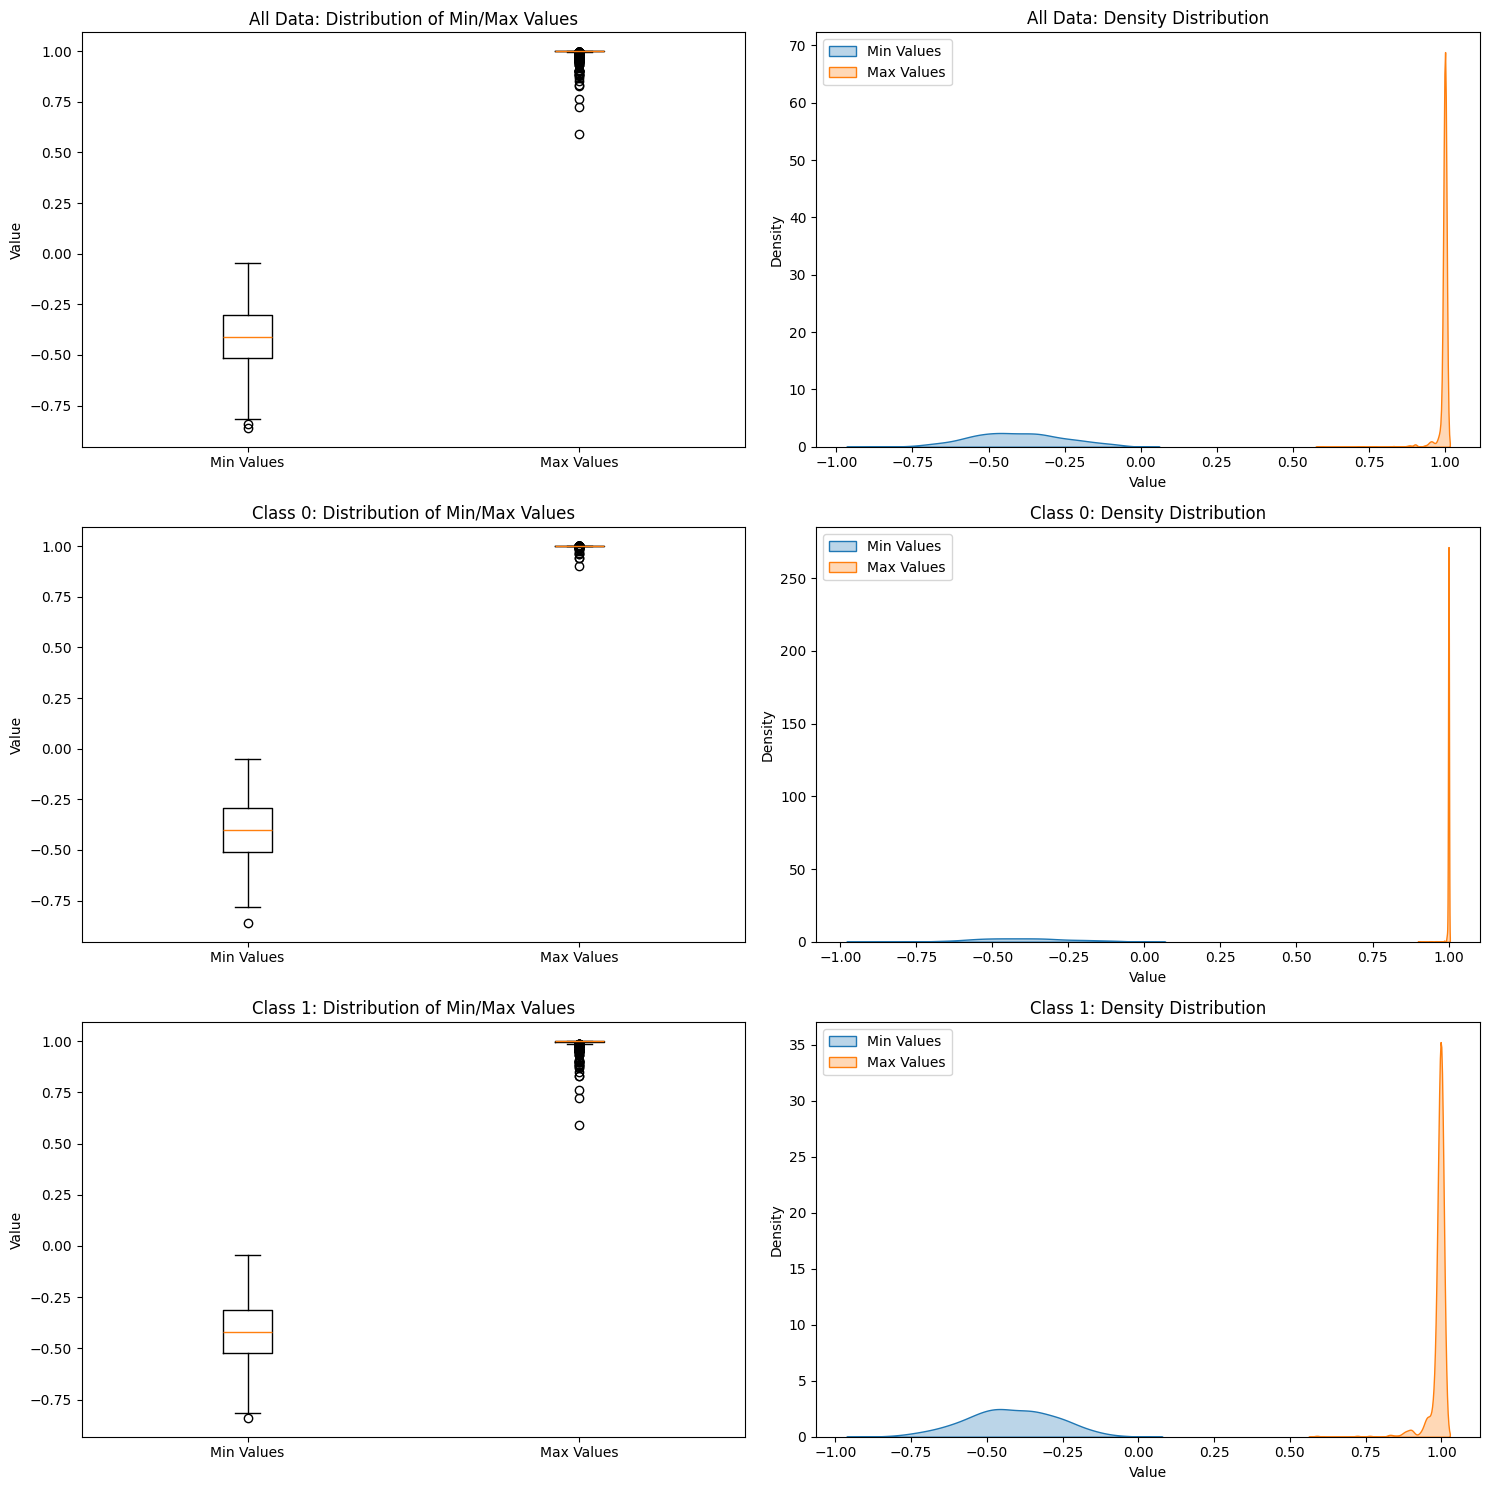

Overall Statistics:

Minimum values:
Mean: -0.4052, Std: 0.1501
Range: [-0.8604, -0.0451]

Maximum values:
Mean: 0.9953, Std: 0.0216
Range: [0.5892, 1.0001]

Class 0 Statistics:
Number of samples: 795

Minimum values:
Mean: -0.3951, Std: 0.1522
Range: [-0.8604, -0.0514]

Maximum values:
Mean: 0.9993, Std: 0.0052
Range: [0.9021, 1.0001]

Class 1 Statistics:
Number of samples: 530

Minimum values:
Mean: -0.4203, Std: 0.1456
Range: [-0.8393, -0.0451]

Maximum values:
Mean: 0.9892, Std: 0.0325
Range: [0.5892, 1.0001]


In [20]:
# Calculate min and max for each matrix
mins = np.array([matrix.min() for matrix in all_C])
maxs = np.array([matrix.max() for matrix in all_C])

plt.figure(figsize=(15, 15))

# Plot of all data
plt.subplot(321)
plt.boxplot([mins, maxs], labels=['Min Values', 'Max Values'])
plt.title('All Data: Distribution of Min/Max Values')
plt.ylabel('Value')

plt.subplot(322)
sns.kdeplot(data=mins, label='Min Values', fill=True, alpha=0.3)
sns.kdeplot(data=maxs, label='Max Values', fill=True, alpha=0.3)
plt.title('All Data: Density Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Plots for each class
for idx, class_label in enumerate([0, 1]):
    class_indices = np.where(k3means_label == class_label)[0]
    class_mins = mins[class_indices]
    class_maxs = maxs[class_indices]
    
    # Box plot for class
    plt.subplot(323 + idx*2)
    plt.boxplot([class_mins, class_maxs], labels=['Min Values', 'Max Values'])
    plt.title(f'Class {class_label}: Distribution of Min/Max Values')
    plt.ylabel('Value')
    
    # Density plot for class
    plt.subplot(324 + idx*2)
    sns.kdeplot(data=class_mins, label='Min Values', fill=True, alpha=0.3)
    sns.kdeplot(data=class_maxs, label='Max Values', fill=True, alpha=0.3)
    plt.title(f'Class {class_label}: Density Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Print statistics for all data and by class
print("Overall Statistics:")
print("\nMinimum values:")
print(f"Mean: {np.mean(mins):.4f}, Std: {np.std(mins):.4f}")
print(f"Range: [{np.min(mins):.4f}, {np.max(mins):.4f}]")

print("\nMaximum values:")
print(f"Mean: {np.mean(maxs):.4f}, Std: {np.std(maxs):.4f}")
print(f"Range: [{np.min(maxs):.4f}, {np.max(maxs):.4f}]")

# Print statistics by class
for class_label in [0, 1]:
    class_indices = np.where(k3means_label == class_label)[0]
    class_mins = mins[class_indices]
    class_maxs = maxs[class_indices]
    
    print(f"\nClass {class_label} Statistics:")
    print(f"Number of samples: {len(class_indices)}")
    print("\nMinimum values:")
    print(f"Mean: {np.mean(class_mins):.4f}, Std: {np.std(class_mins):.4f}")
    print(f"Range: [{np.min(class_mins):.4f}, {np.max(class_mins):.4f}]")
    
    print("\nMaximum values:")
    print(f"Mean: {np.mean(class_maxs):.4f}, Std: {np.std(class_maxs):.4f}")
    print(f"Range: [{np.min(class_maxs):.4f}, {np.max(class_maxs):.4f}]")